In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [2]:
path_train = "./try1/train_processed.csv"

def load_data(path):
    df = pd.read_csv(path)
    return df

df_train = load_data(path_train)
df_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,mpg
0,4,135.0,84.0,2525.0,16.0,82,1,1,29.0
1,4,89.0,71.0,1925.0,14.0,79,2,2,31.9
2,6,156.0,108.0,2930.0,15.5,76,3,3,19.0
3,4,90.0,75.0,2125.0,14.5,74,1,1,28.0
4,4,89.0,62.0,2050.0,17.3,81,3,3,37.7


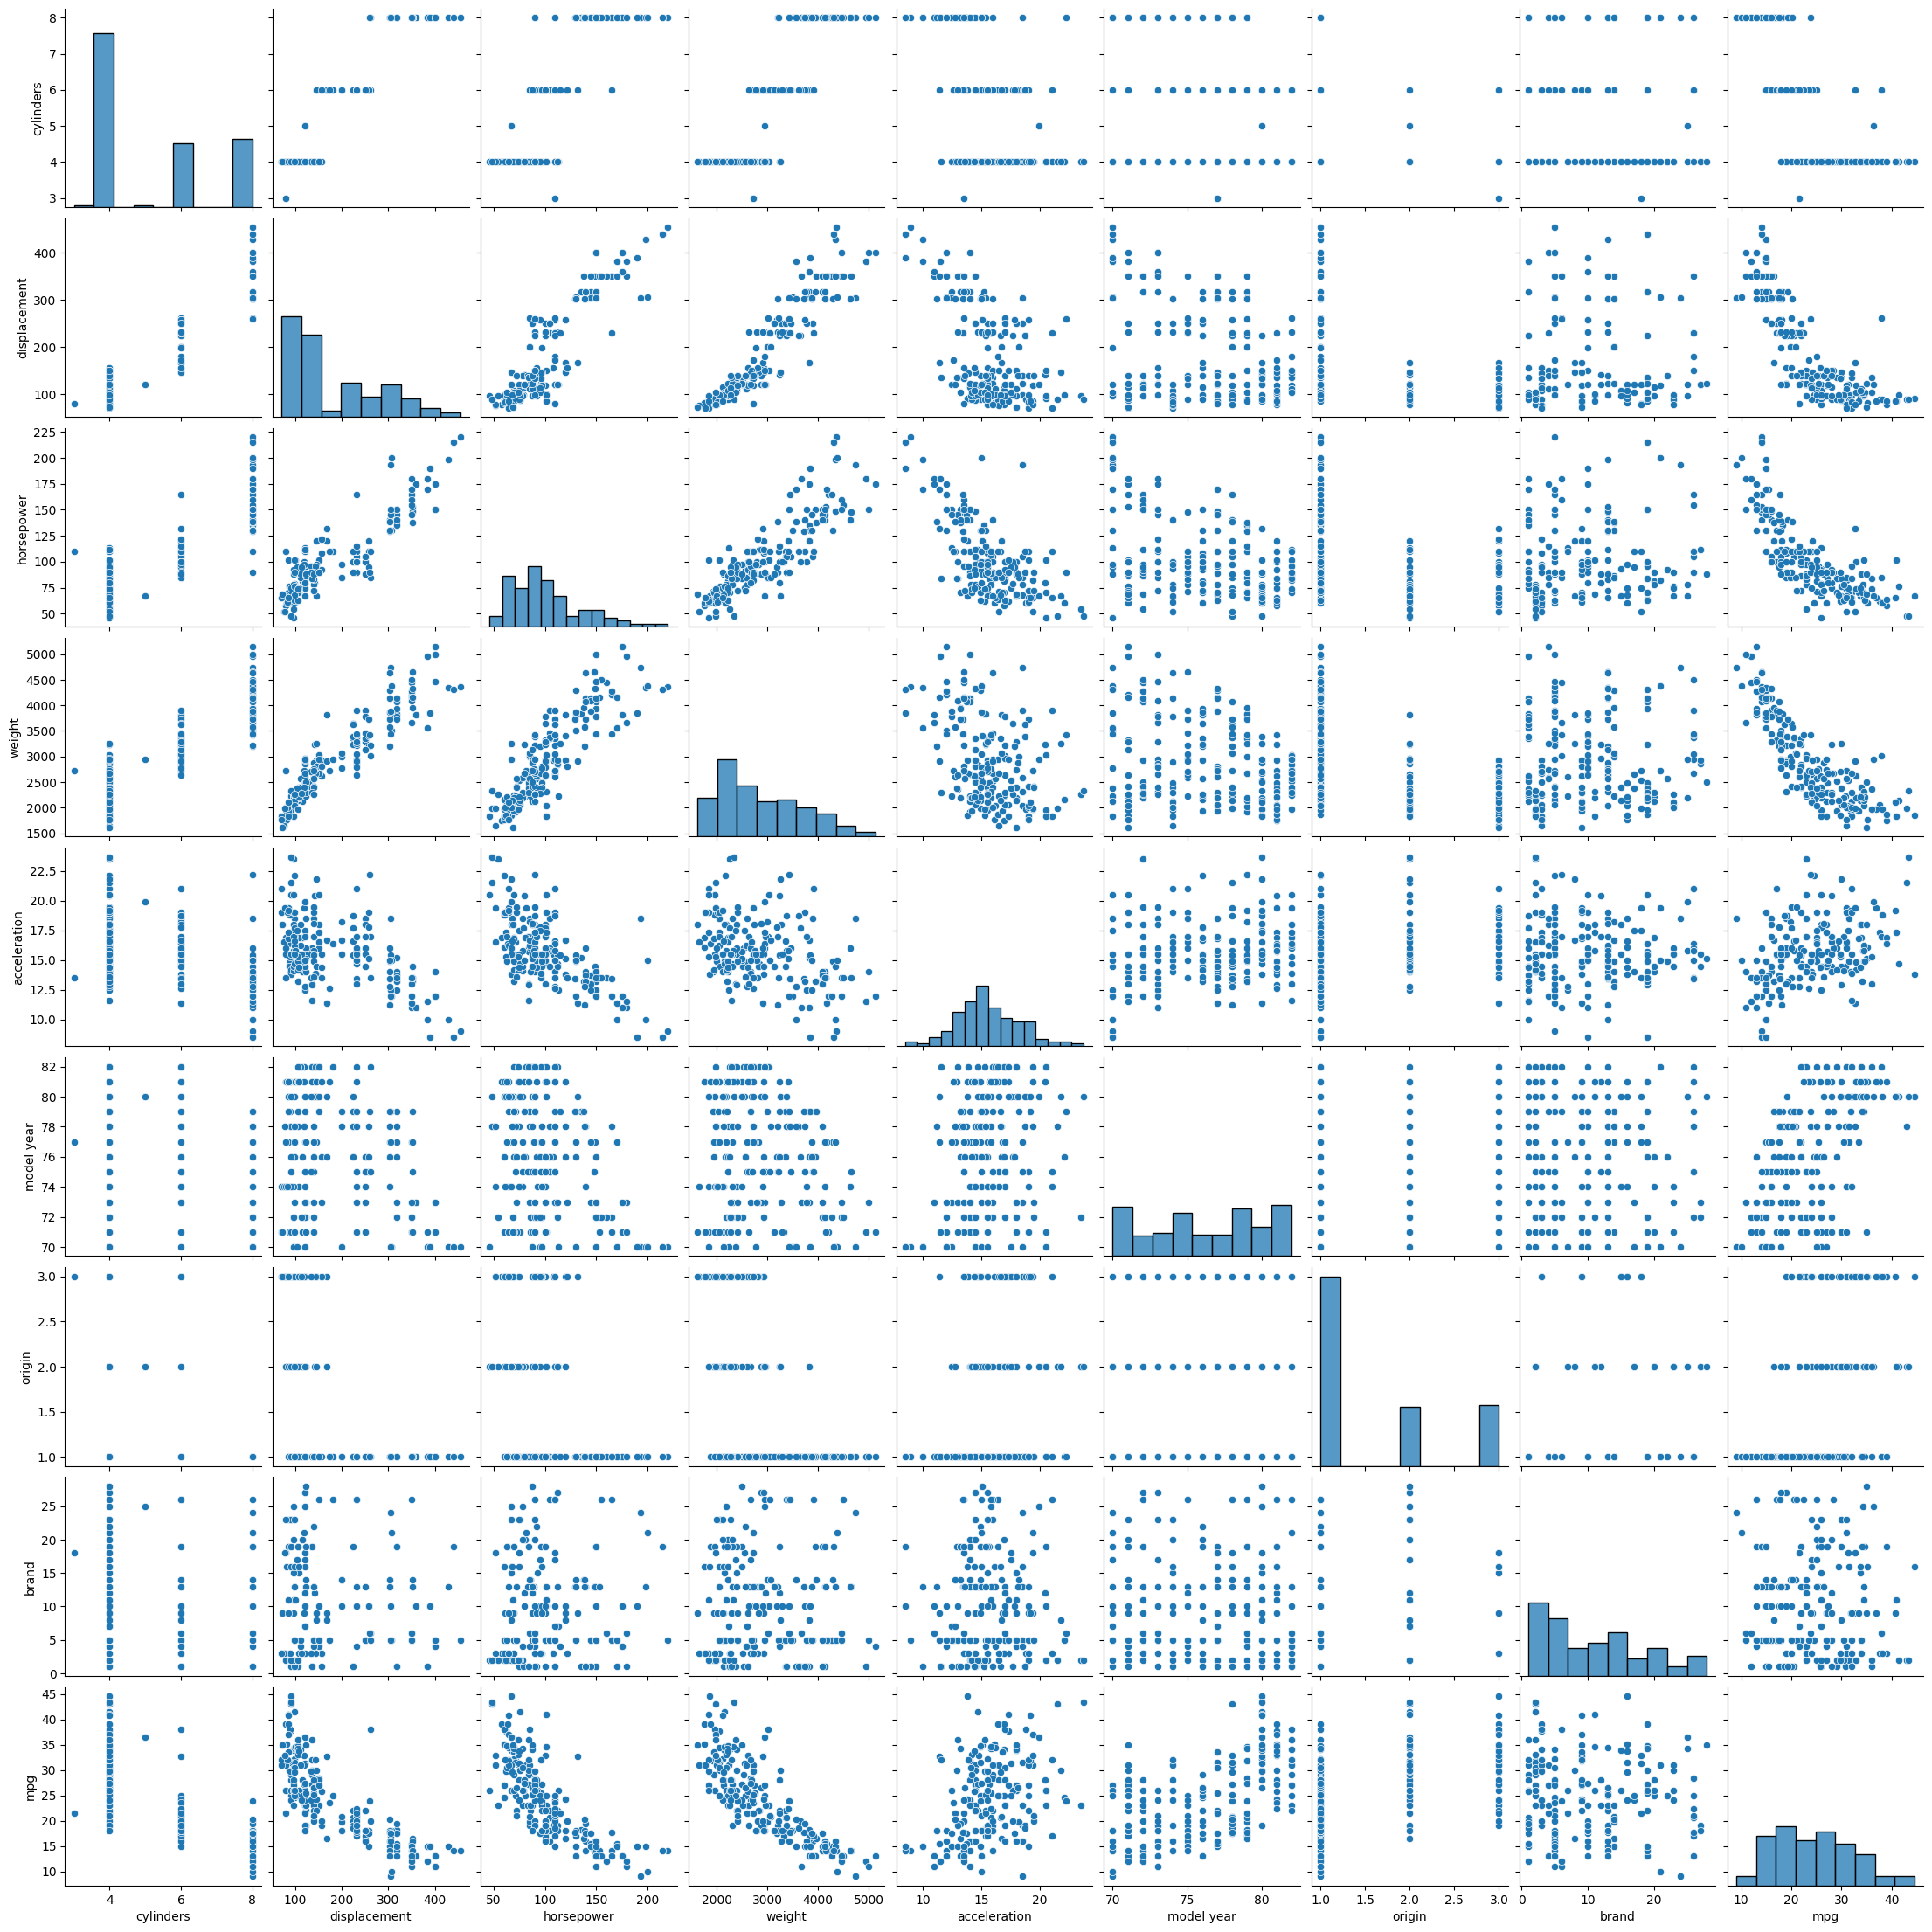

In [13]:
sns.pairplot(df_train)

In [14]:
df_train.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
brand             int64
mpg             float64
dtype: object

In [3]:
def split_Xy(df):
    X = df.drop("mpg", axis=1)
    y = df["mpg"]
    return X, y

X, y = split_Xy(df_train)

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [5]:

# optunaの目的関数を設定する
def objective(trial):
    criterion1 = trial.suggest_categorical('criterion1', ['squared_error', 'friedman_mse', 'poisson', 'absolute_error'])
    max_depth1 = trial.suggest_int('max_depth1', 1, 200)
    max_leaf_nodes1 = trial.suggest_int('max_leaf_nodes1', 2, 100)
    n_estimators1 =  trial.suggest_int('n_estimators1', 2, 1000)
    min_samples_split1 = trial.suggest_int('min_samples_split1',2,5)
    min_samples_leaf1 = trial.suggest_int('min_samples_leaf1',1,10)

    criterion2 = trial.suggest_categorical('criterion2', ['squared_error', 'friedman_mse', 'poisson', 'absolute_error'])
    max_depth2 = trial.suggest_int('max_depth2', 1, 200)
    max_leaf_nodes2 = trial.suggest_int('max_leaf_nodes2', 2, 100)
    n_estimators2 =  trial.suggest_int('n_estimators2', 2, 1000)
    min_samples_split2 = trial.suggest_int('min_samples_split2',2,5)
    min_samples_leaf2 = trial.suggest_int('min_samples_leaf2',1,10)

    regr1 = RandomForestRegressor(
        criterion = criterion1,
        max_depth = max_depth1,
        max_leaf_nodes = max_leaf_nodes1,
        n_estimators = n_estimators1,
        min_samples_split = min_samples_split1,
        min_samples_leaf = min_samples_leaf1,
        n_jobs=4)

    regr2 = RandomForestRegressor(
        criterion = criterion2,
        max_depth = max_depth2,
        max_leaf_nodes = max_leaf_nodes2,
        n_estimators = n_estimators2,
        min_samples_split = min_samples_split2,
        min_samples_leaf = min_samples_leaf2,
        n_jobs=4)
    #score = cross_val_score(regr, X_train, y_train, cv=5, scoring="r2")
    #r2_mean = score.mean()
    regr1.fit(X_train, y_train)
    regr2.fit(X_train, y_train)
    
    y_pred = (regr1.predict(X_val) + regr2.predict(X_val))/2
    
    RMSE = np.sqrt(mean_squared_error(y_val, y_pred))
    print("RMSE:", RMSE)

    return RMSE

In [6]:
#optunaで学習
study = optuna.create_study()
study.optimize(objective, n_trials=150)

[I 2023-09-27 19:13:52,201] A new study created in memory with name: no-name-bb337b81-df24-45ad-9a8a-9959eb849c78
[I 2023-09-27 19:13:52,864] Trial 0 finished with value: 3.0613933216428695 and parameters: {'criterion1': 'absolute_error', 'max_depth1': 50, 'max_leaf_nodes1': 73, 'n_estimators1': 287, 'min_samples_split1': 2, 'min_samples_leaf1': 10, 'criterion2': 'poisson', 'max_depth2': 99, 'max_leaf_nodes2': 46, 'n_estimators2': 52, 'min_samples_split2': 4, 'min_samples_leaf2': 3}. Best is trial 0 with value: 3.0613933216428695.


RMSE: 3.0613933216428695


[I 2023-09-27 19:13:55,206] Trial 1 finished with value: 3.2726225580157347 and parameters: {'criterion1': 'absolute_error', 'max_depth1': 3, 'max_leaf_nodes1': 57, 'n_estimators1': 965, 'min_samples_split1': 4, 'min_samples_leaf1': 7, 'criterion2': 'absolute_error', 'max_depth2': 175, 'max_leaf_nodes2': 35, 'n_estimators2': 878, 'min_samples_split2': 2, 'min_samples_leaf2': 8}. Best is trial 0 with value: 3.0613933216428695.


RMSE: 3.2726225580157347


[I 2023-09-27 19:13:56,464] Trial 2 finished with value: 3.194955134694768 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 15, 'max_leaf_nodes1': 28, 'n_estimators1': 777, 'min_samples_split1': 4, 'min_samples_leaf1': 10, 'criterion2': 'absolute_error', 'max_depth2': 69, 'max_leaf_nodes2': 67, 'n_estimators2': 54, 'min_samples_split2': 3, 'min_samples_leaf2': 8}. Best is trial 0 with value: 3.0613933216428695.


RMSE: 3.194955134694768


[I 2023-09-27 19:13:57,195] Trial 3 finished with value: 2.9336768489224436 and parameters: {'criterion1': 'poisson', 'max_depth1': 54, 'max_leaf_nodes1': 100, 'n_estimators1': 262, 'min_samples_split1': 3, 'min_samples_leaf1': 6, 'criterion2': 'poisson', 'max_depth2': 68, 'max_leaf_nodes2': 42, 'n_estimators2': 181, 'min_samples_split2': 5, 'min_samples_leaf2': 6}. Best is trial 3 with value: 2.9336768489224436.


RMSE: 2.9336768489224436


[I 2023-09-27 19:13:58,538] Trial 4 finished with value: 2.8654441170695604 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 91, 'max_leaf_nodes1': 15, 'n_estimators1': 504, 'min_samples_split1': 3, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 116, 'max_leaf_nodes2': 56, 'n_estimators2': 591, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 4 with value: 2.8654441170695604.


RMSE: 2.8654441170695604


[I 2023-09-27 19:14:00,447] Trial 5 finished with value: 3.387126959117934 and parameters: {'criterion1': 'squared_error', 'max_depth1': 129, 'max_leaf_nodes1': 94, 'n_estimators1': 918, 'min_samples_split1': 5, 'min_samples_leaf1': 9, 'criterion2': 'poisson', 'max_depth2': 79, 'max_leaf_nodes2': 3, 'n_estimators2': 714, 'min_samples_split2': 2, 'min_samples_leaf2': 8}. Best is trial 4 with value: 2.8654441170695604.


RMSE: 3.387126959117934


[I 2023-09-27 19:14:01,770] Trial 6 finished with value: 2.911234888766229 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 109, 'max_leaf_nodes1': 15, 'n_estimators1': 689, 'min_samples_split1': 2, 'min_samples_leaf1': 1, 'criterion2': 'squared_error', 'max_depth2': 150, 'max_leaf_nodes2': 38, 'n_estimators2': 363, 'min_samples_split2': 4, 'min_samples_leaf2': 2}. Best is trial 4 with value: 2.8654441170695604.


RMSE: 2.911234888766229


[I 2023-09-27 19:14:02,741] Trial 7 finished with value: 2.9692334951611463 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 22, 'max_leaf_nodes1': 31, 'n_estimators1': 138, 'min_samples_split1': 4, 'min_samples_leaf1': 4, 'criterion2': 'squared_error', 'max_depth2': 16, 'max_leaf_nodes2': 64, 'n_estimators2': 691, 'min_samples_split2': 4, 'min_samples_leaf2': 9}. Best is trial 4 with value: 2.8654441170695604.


RMSE: 2.9692334951611463


[I 2023-09-27 19:14:04,848] Trial 8 finished with value: 2.898653929402653 and parameters: {'criterion1': 'absolute_error', 'max_depth1': 184, 'max_leaf_nodes1': 64, 'n_estimators1': 849, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'friedman_mse', 'max_depth2': 123, 'max_leaf_nodes2': 52, 'n_estimators2': 436, 'min_samples_split2': 2, 'min_samples_leaf2': 3}. Best is trial 4 with value: 2.8654441170695604.


RMSE: 2.898653929402653


[I 2023-09-27 19:14:05,483] Trial 9 finished with value: 2.8413099445772176 and parameters: {'criterion1': 'squared_error', 'max_depth1': 155, 'max_leaf_nodes1': 83, 'n_estimators1': 185, 'min_samples_split1': 3, 'min_samples_leaf1': 2, 'criterion2': 'squared_error', 'max_depth2': 88, 'max_leaf_nodes2': 95, 'n_estimators2': 194, 'min_samples_split2': 3, 'min_samples_leaf2': 2}. Best is trial 9 with value: 2.8413099445772176.


RMSE: 2.8413099445772176


[I 2023-09-27 19:14:06,135] Trial 10 finished with value: 2.8709442612160747 and parameters: {'criterion1': 'squared_error', 'max_depth1': 192, 'max_leaf_nodes1': 80, 'n_estimators1': 15, 'min_samples_split1': 3, 'min_samples_leaf1': 4, 'criterion2': 'squared_error', 'max_depth2': 11, 'max_leaf_nodes2': 99, 'n_estimators2': 274, 'min_samples_split2': 3, 'min_samples_leaf2': 1}. Best is trial 9 with value: 2.8413099445772176.


RMSE: 2.8709442612160747


[I 2023-09-27 19:14:07,770] Trial 11 finished with value: 3.1680416691254676 and parameters: {'criterion1': 'squared_error', 'max_depth1': 145, 'max_leaf_nodes1': 3, 'n_estimators1': 523, 'min_samples_split1': 3, 'min_samples_leaf1': 3, 'criterion2': 'friedman_mse', 'max_depth2': 129, 'max_leaf_nodes2': 99, 'n_estimators2': 631, 'min_samples_split2': 5, 'min_samples_leaf2': 5}. Best is trial 9 with value: 2.8413099445772176.


RMSE: 3.1680416691254676


[I 2023-09-27 19:14:09,183] Trial 12 finished with value: 2.838849918058738 and parameters: {'criterion1': 'poisson', 'max_depth1': 82, 'max_leaf_nodes1': 44, 'n_estimators1': 559, 'min_samples_split1': 3, 'min_samples_leaf1': 2, 'criterion2': 'squared_error', 'max_depth2': 46, 'max_leaf_nodes2': 81, 'n_estimators2': 535, 'min_samples_split2': 3, 'min_samples_leaf2': 5}. Best is trial 12 with value: 2.838849918058738.


RMSE: 2.838849918058738


[I 2023-09-27 19:14:10,418] Trial 13 finished with value: 2.8459664879381763 and parameters: {'criterion1': 'poisson', 'max_depth1': 164, 'max_leaf_nodes1': 39, 'n_estimators1': 367, 'min_samples_split1': 2, 'min_samples_leaf1': 3, 'criterion2': 'squared_error', 'max_depth2': 59, 'max_leaf_nodes2': 83, 'n_estimators2': 480, 'min_samples_split2': 3, 'min_samples_leaf2': 4}. Best is trial 12 with value: 2.838849918058738.


RMSE: 2.8459664879381763


[I 2023-09-27 19:14:12,349] Trial 14 finished with value: 2.835285939931513 and parameters: {'criterion1': 'poisson', 'max_depth1': 83, 'max_leaf_nodes1': 47, 'n_estimators1': 648, 'min_samples_split1': 3, 'min_samples_leaf1': 5, 'criterion2': 'squared_error', 'max_depth2': 41, 'max_leaf_nodes2': 80, 'n_estimators2': 920, 'min_samples_split2': 3, 'min_samples_leaf2': 1}. Best is trial 14 with value: 2.835285939931513.


RMSE: 2.835285939931513


[I 2023-09-27 19:14:14,610] Trial 15 finished with value: 2.935704991938521 and parameters: {'criterion1': 'poisson', 'max_depth1': 84, 'max_leaf_nodes1': 46, 'n_estimators1': 639, 'min_samples_split1': 4, 'min_samples_leaf1': 7, 'criterion2': 'squared_error', 'max_depth2': 38, 'max_leaf_nodes2': 80, 'n_estimators2': 936, 'min_samples_split2': 3, 'min_samples_leaf2': 6}. Best is trial 14 with value: 2.835285939931513.


RMSE: 2.935704991938521


[I 2023-09-27 19:14:16,291] Trial 16 finished with value: 3.0045226763715247 and parameters: {'criterion1': 'poisson', 'max_depth1': 63, 'max_leaf_nodes1': 52, 'n_estimators1': 635, 'min_samples_split1': 2, 'min_samples_leaf1': 5, 'criterion2': 'squared_error', 'max_depth2': 34, 'max_leaf_nodes2': 76, 'n_estimators2': 821, 'min_samples_split2': 2, 'min_samples_leaf2': 10}. Best is trial 14 with value: 2.835285939931513.


RMSE: 3.0045226763715247


[I 2023-09-27 19:14:17,890] Trial 17 finished with value: 2.937574075698009 and parameters: {'criterion1': 'poisson', 'max_depth1': 122, 'max_leaf_nodes1': 41, 'n_estimators1': 408, 'min_samples_split1': 3, 'min_samples_leaf1': 8, 'criterion2': 'squared_error', 'max_depth2': 42, 'max_leaf_nodes2': 19, 'n_estimators2': 992, 'min_samples_split2': 3, 'min_samples_leaf2': 1}. Best is trial 14 with value: 2.835285939931513.


RMSE: 2.937574075698009


[I 2023-09-27 19:14:19,858] Trial 18 finished with value: 2.915907210828017 and parameters: {'criterion1': 'poisson', 'max_depth1': 76, 'max_leaf_nodes1': 62, 'n_estimators1': 554, 'min_samples_split1': 4, 'min_samples_leaf1': 5, 'criterion2': 'friedman_mse', 'max_depth2': 6, 'max_leaf_nodes2': 86, 'n_estimators2': 800, 'min_samples_split2': 4, 'min_samples_leaf2': 7}. Best is trial 14 with value: 2.835285939931513.


RMSE: 2.915907210828017


[I 2023-09-27 19:14:21,560] Trial 19 finished with value: 2.940794248343084 and parameters: {'criterion1': 'poisson', 'max_depth1': 34, 'max_leaf_nodes1': 29, 'n_estimators1': 749, 'min_samples_split1': 2, 'min_samples_leaf1': 6, 'criterion2': 'absolute_error', 'max_depth2': 52, 'max_leaf_nodes2': 69, 'n_estimators2': 545, 'min_samples_split2': 2, 'min_samples_leaf2': 4}. Best is trial 14 with value: 2.835285939931513.


RMSE: 2.940794248343084


[I 2023-09-27 19:14:23,026] Trial 20 finished with value: 2.840954136446265 and parameters: {'criterion1': 'poisson', 'max_depth1': 105, 'max_leaf_nodes1': 70, 'n_estimators1': 410, 'min_samples_split1': 3, 'min_samples_leaf1': 4, 'criterion2': 'squared_error', 'max_depth2': 195, 'max_leaf_nodes2': 90, 'n_estimators2': 758, 'min_samples_split2': 3, 'min_samples_leaf2': 4}. Best is trial 14 with value: 2.835285939931513.


RMSE: 2.840954136446265


[I 2023-09-27 19:14:24,466] Trial 21 finished with value: 2.8450638618740025 and parameters: {'criterion1': 'poisson', 'max_depth1': 109, 'max_leaf_nodes1': 69, 'n_estimators1': 433, 'min_samples_split1': 3, 'min_samples_leaf1': 4, 'criterion2': 'squared_error', 'max_depth2': 171, 'max_leaf_nodes2': 88, 'n_estimators2': 753, 'min_samples_split2': 3, 'min_samples_leaf2': 4}. Best is trial 14 with value: 2.835285939931513.


RMSE: 2.8450638618740025


[I 2023-09-27 19:14:26,167] Trial 22 finished with value: 2.836000034676925 and parameters: {'criterion1': 'poisson', 'max_depth1': 73, 'max_leaf_nodes1': 52, 'n_estimators1': 575, 'min_samples_split1': 3, 'min_samples_leaf1': 3, 'criterion2': 'squared_error', 'max_depth2': 198, 'max_leaf_nodes2': 74, 'n_estimators2': 883, 'min_samples_split2': 3, 'min_samples_leaf2': 3}. Best is trial 14 with value: 2.835285939931513.


RMSE: 2.836000034676925


[I 2023-09-27 19:14:28,158] Trial 23 finished with value: 2.835076063918328 and parameters: {'criterion1': 'poisson', 'max_depth1': 71, 'max_leaf_nodes1': 52, 'n_estimators1': 556, 'min_samples_split1': 3, 'min_samples_leaf1': 2, 'criterion2': 'squared_error', 'max_depth2': 27, 'max_leaf_nodes2': 77, 'n_estimators2': 905, 'min_samples_split2': 3, 'min_samples_leaf2': 2}. Best is trial 23 with value: 2.835076063918328.


RMSE: 2.835076063918328


[I 2023-09-27 19:14:29,988] Trial 24 finished with value: 2.858905169502621 and parameters: {'criterion1': 'poisson', 'max_depth1': 70, 'max_leaf_nodes1': 55, 'n_estimators1': 614, 'min_samples_split1': 4, 'min_samples_leaf1': 3, 'criterion2': 'squared_error', 'max_depth2': 23, 'max_leaf_nodes2': 72, 'n_estimators2': 921, 'min_samples_split2': 4, 'min_samples_leaf2': 2}. Best is trial 23 with value: 2.835076063918328.


RMSE: 2.858905169502621


[I 2023-09-27 19:14:32,112] Trial 25 finished with value: 2.839232092372445 and parameters: {'criterion1': 'poisson', 'max_depth1': 40, 'max_leaf_nodes1': 49, 'n_estimators1': 738, 'min_samples_split1': 3, 'min_samples_leaf1': 3, 'criterion2': 'squared_error', 'max_depth2': 198, 'max_leaf_nodes2': 59, 'n_estimators2': 880, 'min_samples_split2': 3, 'min_samples_leaf2': 1}. Best is trial 23 with value: 2.835076063918328.


RMSE: 2.839232092372445


[I 2023-09-27 19:14:34,615] Trial 26 finished with value: 2.8165772224700514 and parameters: {'criterion1': 'poisson', 'max_depth1': 54, 'max_leaf_nodes1': 58, 'n_estimators1': 833, 'min_samples_split1': 2, 'min_samples_leaf1': 1, 'criterion2': 'squared_error', 'max_depth2': 143, 'max_leaf_nodes2': 75, 'n_estimators2': 983, 'min_samples_split2': 2, 'min_samples_leaf2': 3}. Best is trial 26 with value: 2.8165772224700514.


RMSE: 2.8165772224700514


[I 2023-09-27 19:14:37,120] Trial 27 finished with value: 2.908350550041185 and parameters: {'criterion1': 'poisson', 'max_depth1': 51, 'max_leaf_nodes1': 37, 'n_estimators1': 841, 'min_samples_split1': 2, 'min_samples_leaf1': 1, 'criterion2': 'absolute_error', 'max_depth2': 140, 'max_leaf_nodes2': 60, 'n_estimators2': 983, 'min_samples_split2': 2, 'min_samples_leaf2': 2}. Best is trial 26 with value: 2.8165772224700514.


RMSE: 2.908350550041185


[I 2023-09-27 19:14:39,639] Trial 28 finished with value: 2.9352923187808933 and parameters: {'criterion1': 'absolute_error', 'max_depth1': 93, 'max_leaf_nodes1': 61, 'n_estimators1': 832, 'min_samples_split1': 2, 'min_samples_leaf1': 2, 'criterion2': 'friedman_mse', 'max_depth2': 162, 'max_leaf_nodes2': 91, 'n_estimators2': 846, 'min_samples_split2': 2, 'min_samples_leaf2': 1}. Best is trial 26 with value: 2.8165772224700514.


RMSE: 2.9352923187808933


[I 2023-09-27 19:14:42,069] Trial 29 finished with value: 2.9440058422103172 and parameters: {'criterion1': 'absolute_error', 'max_depth1': 36, 'max_leaf_nodes1': 80, 'n_estimators1': 697, 'min_samples_split1': 2, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 100, 'max_leaf_nodes2': 49, 'n_estimators2': 987, 'min_samples_split2': 2, 'min_samples_leaf2': 3}. Best is trial 26 with value: 2.8165772224700514.


RMSE: 2.9440058422103172


[I 2023-09-27 19:14:44,328] Trial 30 finished with value: 2.8396423827754536 and parameters: {'criterion1': 'poisson', 'max_depth1': 57, 'max_leaf_nodes1': 76, 'n_estimators1': 998, 'min_samples_split1': 2, 'min_samples_leaf1': 5, 'criterion2': 'squared_error', 'max_depth2': 109, 'max_leaf_nodes2': 74, 'n_estimators2': 672, 'min_samples_split2': 2, 'min_samples_leaf2': 2}. Best is trial 26 with value: 2.8165772224700514.


RMSE: 2.8396423827754536


[I 2023-09-27 19:14:46,315] Trial 31 finished with value: 2.83431398188049 and parameters: {'criterion1': 'poisson', 'max_depth1': 68, 'max_leaf_nodes1': 52, 'n_estimators1': 607, 'min_samples_split1': 3, 'min_samples_leaf1': 2, 'criterion2': 'squared_error', 'max_depth2': 182, 'max_leaf_nodes2': 76, 'n_estimators2': 920, 'min_samples_split2': 3, 'min_samples_leaf2': 3}. Best is trial 26 with value: 2.8165772224700514.


RMSE: 2.83431398188049


[I 2023-09-27 19:14:48,420] Trial 32 finished with value: 2.838349653466674 and parameters: {'criterion1': 'poisson', 'max_depth1': 65, 'max_leaf_nodes1': 57, 'n_estimators1': 889, 'min_samples_split1': 3, 'min_samples_leaf1': 2, 'criterion2': 'squared_error', 'max_depth2': 177, 'max_leaf_nodes2': 78, 'n_estimators2': 938, 'min_samples_split2': 3, 'min_samples_leaf2': 3}. Best is trial 26 with value: 2.8165772224700514.


RMSE: 2.838349653466674


[I 2023-09-27 19:14:50,237] Trial 33 finished with value: 2.829211715844184 and parameters: {'criterion1': 'poisson', 'max_depth1': 45, 'max_leaf_nodes1': 66, 'n_estimators1': 682, 'min_samples_split1': 4, 'min_samples_leaf1': 1, 'criterion2': 'squared_error', 'max_depth2': 151, 'max_leaf_nodes2': 64, 'n_estimators2': 798, 'min_samples_split2': 3, 'min_samples_leaf2': 3}. Best is trial 26 with value: 2.8165772224700514.


RMSE: 2.829211715844184


[I 2023-09-27 19:14:52,391] Trial 34 finished with value: 2.862368070381062 and parameters: {'criterion1': 'poisson', 'max_depth1': 13, 'max_leaf_nodes1': 64, 'n_estimators1': 785, 'min_samples_split1': 4, 'min_samples_leaf1': 1, 'criterion2': 'absolute_error', 'max_depth2': 154, 'max_leaf_nodes2': 64, 'n_estimators2': 787, 'min_samples_split2': 5, 'min_samples_leaf2': 3}. Best is trial 26 with value: 2.8165772224700514.


RMSE: 2.862368070381062


[I 2023-09-27 19:14:53,653] Trial 35 finished with value: 2.834969298313853 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 44, 'max_leaf_nodes1': 86, 'n_estimators1': 469, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'squared_error', 'max_depth2': 180, 'max_leaf_nodes2': 67, 'n_estimators2': 856, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 26 with value: 2.8165772224700514.


RMSE: 2.834969298313853


[I 2023-09-27 19:14:54,877] Trial 36 finished with value: 3.613069469817211 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 1, 'max_leaf_nodes1': 94, 'n_estimators1': 461, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'squared_error', 'max_depth2': 183, 'max_leaf_nodes2': 53, 'n_estimators2': 863, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 26 with value: 2.8165772224700514.


RMSE: 3.613069469817211


[I 2023-09-27 19:14:56,367] Trial 37 finished with value: 2.8291823482845104 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 44, 'max_leaf_nodes1': 88, 'n_estimators1': 934, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 143, 'max_leaf_nodes2': 28, 'n_estimators2': 730, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 26 with value: 2.8165772224700514.


RMSE: 2.8291823482845104


[I 2023-09-27 19:14:57,861] Trial 38 finished with value: 2.893452660522554 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 21, 'max_leaf_nodes1': 89, 'n_estimators1': 928, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 134, 'max_leaf_nodes2': 30, 'n_estimators2': 726, 'min_samples_split2': 5, 'min_samples_leaf2': 7}. Best is trial 26 with value: 2.8165772224700514.


RMSE: 2.893452660522554


[I 2023-09-27 19:14:59,137] Trial 39 finished with value: 3.0001845609997986 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 28, 'max_leaf_nodes1': 74, 'n_estimators1': 793, 'min_samples_split1': 4, 'min_samples_leaf1': 10, 'criterion2': 'poisson', 'max_depth2': 145, 'max_leaf_nodes2': 25, 'n_estimators2': 620, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 26 with value: 2.8165772224700514.


RMSE: 3.0001845609997986


[I 2023-09-27 19:15:00,591] Trial 40 finished with value: 2.8443418100727755 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 48, 'max_leaf_nodes1': 69, 'n_estimators1': 938, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 160, 'max_leaf_nodes2': 43, 'n_estimators2': 667, 'min_samples_split2': 4, 'min_samples_leaf2': 6}. Best is trial 26 with value: 2.8165772224700514.


RMSE: 2.8443418100727755


[I 2023-09-27 19:15:01,981] Trial 41 finished with value: 2.8656299562317504 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 43, 'max_leaf_nodes1': 100, 'n_estimators1': 705, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 183, 'max_leaf_nodes2': 12, 'n_estimators2': 824, 'min_samples_split2': 4, 'min_samples_leaf2': 3}. Best is trial 26 with value: 2.8165772224700514.


RMSE: 2.8656299562317504


[I 2023-09-27 19:15:02,339] Trial 42 finished with value: 2.7765726903158914 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 54, 'max_leaf_nodes1': 87, 'n_estimators1': 336, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 163, 'max_leaf_nodes2': 66, 'n_estimators2': 5, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.7765726903158914


[I 2023-09-27 19:15:02,698] Trial 43 finished with value: 2.8022749607385533 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 59, 'max_leaf_nodes1': 94, 'n_estimators1': 304, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 168, 'max_leaf_nodes2': 57, 'n_estimators2': 39, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.8022749607385533


[I 2023-09-27 19:15:03,000] Trial 44 finished with value: 2.9449874912665246 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 13, 'max_leaf_nodes1': 91, 'n_estimators1': 265, 'min_samples_split1': 5, 'min_samples_leaf1': 3, 'criterion2': 'poisson', 'max_depth2': 166, 'max_leaf_nodes2': 36, 'n_estimators2': 5, 'min_samples_split2': 5, 'min_samples_leaf2': 6}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.9449874912665246


[I 2023-09-27 19:15:03,440] Trial 45 finished with value: 2.8628796946500215 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 60, 'max_leaf_nodes1': 93, 'n_estimators1': 314, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 123, 'max_leaf_nodes2': 57, 'n_estimators2': 118, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.8628796946500215


[I 2023-09-27 19:15:03,717] Trial 46 finished with value: 2.7889339459314724 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 32, 'max_leaf_nodes1': 85, 'n_estimators1': 129, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 152, 'max_leaf_nodes2': 63, 'n_estimators2': 113, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.7889339459314724


[I 2023-09-27 19:15:04,041] Trial 47 finished with value: 2.9153992431735394 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 32, 'max_leaf_nodes1': 84, 'n_estimators1': 186, 'min_samples_split1': 5, 'min_samples_leaf1': 4, 'criterion2': 'poisson', 'max_depth2': 139, 'max_leaf_nodes2': 50, 'n_estimators2': 97, 'min_samples_split2': 4, 'min_samples_leaf2': 7}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.9153992431735394


[I 2023-09-27 19:15:04,299] Trial 48 finished with value: 2.791301891792946 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 24, 'max_leaf_nodes1': 97, 'n_estimators1': 15, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 112, 'max_leaf_nodes2': 45, 'n_estimators2': 218, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.791301891792946


[I 2023-09-27 19:15:04,568] Trial 49 finished with value: 2.7785566505299992 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 11, 'max_leaf_nodes1': 97, 'n_estimators1': 11, 'min_samples_split1': 5, 'min_samples_leaf1': 3, 'criterion2': 'poisson', 'max_depth2': 88, 'max_leaf_nodes2': 43, 'n_estimators2': 226, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.7785566505299992


[I 2023-09-27 19:15:04,893] Trial 50 finished with value: 2.870623726139755 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 22, 'max_leaf_nodes1': 96, 'n_estimators1': 64, 'min_samples_split1': 5, 'min_samples_leaf1': 3, 'criterion2': 'poisson', 'max_depth2': 78, 'max_leaf_nodes2': 43, 'n_estimators2': 242, 'min_samples_split2': 4, 'min_samples_leaf2': 6}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.870623726139755


[I 2023-09-27 19:15:05,151] Trial 51 finished with value: 2.833415232813662 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 10, 'max_leaf_nodes1': 100, 'n_estimators1': 70, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 89, 'max_leaf_nodes2': 54, 'n_estimators2': 169, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.
[I 2023-09-27 19:15:05,243] Trial 52 finished with value: 2.9423887118011316 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 26, 'max_leaf_nodes1': 80, 'n_estimators1': 18, 'min_samples_split1': 5, 'min_samples_leaf1': 3, 'criterion2': 'poisson', 'max_depth2': 113, 'max_leaf_nodes2': 48, 'n_estimators2': 4, 'min_samples_split2': 5, 'min_samples_leaf2': 4}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.833415232813662
RMSE: 2.9423887118011316


[I 2023-09-27 19:15:05,737] Trial 53 finished with value: 2.9802913920182474 and parameters: {'criterion1': 'squared_error', 'max_depth1': 4, 'max_leaf_nodes1': 97, 'n_estimators1': 157, 'min_samples_split1': 5, 'min_samples_leaf1': 9, 'criterion2': 'poisson', 'max_depth2': 126, 'max_leaf_nodes2': 61, 'n_estimators2': 343, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.9802913920182474


[I 2023-09-27 19:15:05,948] Trial 54 finished with value: 2.9021452096165863 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 54, 'max_leaf_nodes1': 90, 'n_estimators1': 95, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 91, 'max_leaf_nodes2': 38, 'n_estimators2': 79, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.9021452096165863


[I 2023-09-27 19:15:06,314] Trial 55 finished with value: 2.8972877242054107 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 18, 'max_leaf_nodes1': 22, 'n_estimators1': 214, 'min_samples_split1': 5, 'min_samples_leaf1': 3, 'criterion2': 'poisson', 'max_depth2': 157, 'max_leaf_nodes2': 44, 'n_estimators2': 148, 'min_samples_split2': 4, 'min_samples_leaf2': 6}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.8972877242054107


[I 2023-09-27 19:15:06,857] Trial 56 finished with value: 2.8378190688152665 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 32, 'max_leaf_nodes1': 82, 'n_estimators1': 328, 'min_samples_split1': 4, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 67, 'max_leaf_nodes2': 69, 'n_estimators2': 228, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.8378190688152665


[I 2023-09-27 19:15:07,344] Trial 57 finished with value: 2.8928444685479184 and parameters: {'criterion1': 'absolute_error', 'max_depth1': 38, 'max_leaf_nodes1': 77, 'n_estimators1': 119, 'min_samples_split1': 5, 'min_samples_leaf1': 4, 'criterion2': 'poisson', 'max_depth2': 169, 'max_leaf_nodes2': 56, 'n_estimators2': 317, 'min_samples_split2': 5, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.
[I 2023-09-27 19:15:07,462] Trial 58 finished with value: 2.8604872265413306 and parameters: {'criterion1': 'squared_error', 'max_depth1': 26, 'max_leaf_nodes1': 96, 'n_estimators1': 12, 'min_samples_split1': 5, 'min_samples_leaf1': 3, 'criterion2': 'friedman_mse', 'max_depth2': 107, 'max_leaf_nodes2': 40, 'n_estimators2': 49, 'min_samples_split2': 4, 'min_samples_leaf2': 6}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.8928444685479184
RMSE: 2.8604872265413306


[I 2023-09-27 19:15:08,092] Trial 59 finished with value: 2.8918715569385736 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 7, 'max_leaf_nodes1': 85, 'n_estimators1': 233, 'min_samples_split1': 5, 'min_samples_leaf1': 7, 'criterion2': 'poisson', 'max_depth2': 118, 'max_leaf_nodes2': 33, 'n_estimators2': 401, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 42 with value: 2.7765726903158914.
[I 2023-09-27 19:15:08,276] Trial 60 finished with value: 2.8898142865073764 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 91, 'max_leaf_nodes1': 92, 'n_estimators1': 50, 'min_samples_split1': 4, 'min_samples_leaf1': 1, 'criterion2': 'absolute_error', 'max_depth2': 134, 'max_leaf_nodes2': 62, 'n_estimators2': 61, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.8918715569385736
RMSE: 2.8898142865073764


[I 2023-09-27 19:15:08,779] Trial 61 finished with value: 2.826640449123812 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 55, 'max_leaf_nodes1': 88, 'n_estimators1': 357, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 145, 'max_leaf_nodes2': 21, 'n_estimators2': 139, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.826640449123812


[I 2023-09-27 19:15:09,254] Trial 62 finished with value: 3.5881368588562554 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 54, 'max_leaf_nodes1': 87, 'n_estimators1': 342, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 148, 'max_leaf_nodes2': 2, 'n_estimators2': 133, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 3.5881368588562554


[I 2023-09-27 19:15:09,807] Trial 63 finished with value: 2.8866323359889785 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 81, 'max_leaf_nodes1': 97, 'n_estimators1': 362, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 190, 'max_leaf_nodes2': 22, 'n_estimators2': 198, 'min_samples_split2': 4, 'min_samples_leaf2': 7}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.8866323359889785


[I 2023-09-27 19:15:10,165] Trial 64 finished with value: 2.8016302176850054 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 59, 'max_leaf_nodes1': 100, 'n_estimators1': 289, 'min_samples_split1': 5, 'min_samples_leaf1': 3, 'criterion2': 'poisson', 'max_depth2': 81, 'max_leaf_nodes2': 16, 'n_estimators2': 38, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.8016302176850054


[I 2023-09-27 19:15:10,519] Trial 65 finished with value: 2.859662252199161 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 63, 'max_leaf_nodes1': 94, 'n_estimators1': 286, 'min_samples_split1': 5, 'min_samples_leaf1': 3, 'criterion2': 'poisson', 'max_depth2': 79, 'max_leaf_nodes2': 70, 'n_estimators2': 35, 'min_samples_split2': 4, 'min_samples_leaf2': 6}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.859662252199161


[I 2023-09-27 19:15:11,000] Trial 66 finished with value: 2.998190913734158 and parameters: {'criterion1': 'absolute_error', 'max_depth1': 17, 'max_leaf_nodes1': 98, 'n_estimators1': 151, 'min_samples_split1': 5, 'min_samples_leaf1': 4, 'criterion2': 'friedman_mse', 'max_depth2': 73, 'max_leaf_nodes2': 10, 'n_estimators2': 294, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.998190913734158


[I 2023-09-27 19:15:11,237] Trial 67 finished with value: 2.840510564156685 and parameters: {'criterion1': 'squared_error', 'max_depth1': 124, 'max_leaf_nodes1': 100, 'n_estimators1': 99, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 95, 'max_leaf_nodes2': 84, 'n_estimators2': 100, 'min_samples_split2': 4, 'min_samples_leaf2': 6}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.840510564156685


[I 2023-09-27 19:15:11,508] Trial 68 finished with value: 2.8772862570100894 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 50, 'max_leaf_nodes1': 92, 'n_estimators1': 214, 'min_samples_split1': 4, 'min_samples_leaf1': 3, 'criterion2': 'poisson', 'max_depth2': 60, 'max_leaf_nodes2': 66, 'n_estimators2': 26, 'min_samples_split2': 5, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.8772862570100894


[I 2023-09-27 19:15:11,874] Trial 69 finished with value: 2.9149190917720196 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 76, 'max_leaf_nodes1': 35, 'n_estimators1': 38, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'absolute_error', 'max_depth2': 84, 'max_leaf_nodes2': 46, 'n_estimators2': 213, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.9149190917720196


[I 2023-09-27 19:15:12,418] Trial 70 finished with value: 2.840489011644091 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 99, 'max_leaf_nodes1': 77, 'n_estimators1': 390, 'min_samples_split1': 5, 'min_samples_leaf1': 4, 'criterion2': 'poisson', 'max_depth2': 104, 'max_leaf_nodes2': 57, 'n_estimators2': 170, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.840489011644091


[I 2023-09-27 19:15:12,911] Trial 71 finished with value: 2.8390184697050764 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 59, 'max_leaf_nodes1': 87, 'n_estimators1': 237, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 172, 'max_leaf_nodes2': 18, 'n_estimators2': 250, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.8390184697050764


[I 2023-09-27 19:15:13,280] Trial 72 finished with value: 2.8721876337703756 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 36, 'max_leaf_nodes1': 89, 'n_estimators1': 297, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 153, 'max_leaf_nodes2': 13, 'n_estimators2': 74, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.8721876337703756


[I 2023-09-27 19:15:13,913] Trial 73 finished with value: 3.0047139882125764 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 29, 'max_leaf_nodes1': 82, 'n_estimators1': 497, 'min_samples_split1': 5, 'min_samples_leaf1': 3, 'criterion2': 'poisson', 'max_depth2': 165, 'max_leaf_nodes2': 9, 'n_estimators2': 153, 'min_samples_split2': 4, 'min_samples_leaf2': 10}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 3.0047139882125764


[I 2023-09-27 19:15:14,239] Trial 74 finished with value: 2.81558261091146 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 67, 'max_leaf_nodes1': 94, 'n_estimators1': 186, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 132, 'max_leaf_nodes2': 15, 'n_estimators2': 114, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.81558261091146


[I 2023-09-27 19:15:14,838] Trial 75 finished with value: 3.080469685601475 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 65, 'max_leaf_nodes1': 4, 'n_estimators1': 180, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 131, 'max_leaf_nodes2': 16, 'n_estimators2': 481, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 3.080469685601475


[I 2023-09-27 19:15:15,079] Trial 76 finished with value: 2.796410041308108 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 78, 'max_leaf_nodes1': 95, 'n_estimators1': 108, 'min_samples_split1': 4, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 121, 'max_leaf_nodes2': 72, 'n_estimators2': 103, 'min_samples_split2': 4, 'min_samples_leaf2': 3}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.796410041308108


[I 2023-09-27 19:15:15,339] Trial 77 finished with value: 2.807393587725438 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 76, 'max_leaf_nodes1': 93, 'n_estimators1': 123, 'min_samples_split1': 4, 'min_samples_leaf1': 3, 'criterion2': 'poisson', 'max_depth2': 120, 'max_leaf_nodes2': 71, 'n_estimators2': 97, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.807393587725438


[I 2023-09-27 19:15:15,579] Trial 78 finished with value: 2.816296253400377 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 76, 'max_leaf_nodes1': 95, 'n_estimators1': 117, 'min_samples_split1': 4, 'min_samples_leaf1': 3, 'criterion2': 'poisson', 'max_depth2': 118, 'max_leaf_nodes2': 72, 'n_estimators2': 86, 'min_samples_split2': 4, 'min_samples_leaf2': 3}. Best is trial 42 with value: 2.7765726903158914.
[I 2023-09-27 19:15:15,747] Trial 79 finished with value: 2.901988100386482 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 83, 'max_leaf_nodes1': 91, 'n_estimators1': 84, 'min_samples_split1': 4, 'min_samples_leaf1': 4, 'criterion2': 'poisson', 'max_depth2': 97, 'max_leaf_nodes2': 66, 'n_estimators2': 32, 'min_samples_split2': 4, 'min_samples_leaf2': 9}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.816296253400377
RMSE: 2.901988100386482


[I 2023-09-27 19:15:15,894] Trial 80 finished with value: 2.792403447049271 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 88, 'max_leaf_nodes1': 98, 'n_estimators1': 42, 'min_samples_split1': 4, 'min_samples_leaf1': 3, 'criterion2': 'poisson', 'max_depth2': 111, 'max_leaf_nodes2': 53, 'n_estimators2': 59, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 42 with value: 2.7765726903158914.
[I 2023-09-27 19:15:16,051] Trial 81 finished with value: 2.891706029901503 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 98, 'max_leaf_nodes1': 98, 'n_estimators1': 33, 'min_samples_split1': 4, 'min_samples_leaf1': 3, 'criterion2': 'poisson', 'max_depth2': 115, 'max_leaf_nodes2': 54, 'n_estimators2': 62, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.792403447049271
RMSE: 2.891706029901503


[I 2023-09-27 19:15:16,136] Trial 82 finished with value: 2.9362224904237473 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 111, 'max_leaf_nodes1': 100, 'n_estimators1': 6, 'min_samples_split1': 4, 'min_samples_leaf1': 3, 'criterion2': 'poisson', 'max_depth2': 123, 'max_leaf_nodes2': 59, 'n_estimators2': 14, 'min_samples_split2': 4, 'min_samples_leaf2': 3}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.9362224904237473


[I 2023-09-27 19:15:16,374] Trial 83 finished with value: 2.832967296405129 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 88, 'max_leaf_nodes1': 93, 'n_estimators1': 138, 'min_samples_split1': 4, 'min_samples_leaf1': 5, 'criterion2': 'poisson', 'max_depth2': 110, 'max_leaf_nodes2': 51, 'n_estimators2': 49, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.832967296405129


[I 2023-09-27 19:15:16,594] Trial 84 finished with value: 2.8339223251474026 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 73, 'max_leaf_nodes1': 96, 'n_estimators1': 59, 'min_samples_split1': 4, 'min_samples_leaf1': 3, 'criterion2': 'poisson', 'max_depth2': 94, 'max_leaf_nodes2': 47, 'n_estimators2': 119, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.8339223251474026


[I 2023-09-27 19:15:16,949] Trial 85 finished with value: 2.8680656498949273 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 171, 'max_leaf_nodes1': 84, 'n_estimators1': 126, 'min_samples_split1': 4, 'min_samples_leaf1': 4, 'criterion2': 'friedman_mse', 'max_depth2': 103, 'max_leaf_nodes2': 62, 'n_estimators2': 188, 'min_samples_split2': 4, 'min_samples_leaf2': 6}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.8680656498949273


[I 2023-09-27 19:15:17,203] Trial 86 finished with value: 2.890133182242553 and parameters: {'criterion1': 'absolute_error', 'max_depth1': 86, 'max_leaf_nodes1': 90, 'n_estimators1': 86, 'min_samples_split1': 4, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 99, 'max_leaf_nodes2': 78, 'n_estimators2': 91, 'min_samples_split2': 4, 'min_samples_leaf2': 3}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.890133182242553


[I 2023-09-27 19:15:17,652] Trial 87 finished with value: 2.8197952879089856 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 79, 'max_leaf_nodes1': 98, 'n_estimators1': 167, 'min_samples_split1': 4, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 137, 'max_leaf_nodes2': 64, 'n_estimators2': 273, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 42 with value: 2.7765726903158914.
[I 2023-09-27 19:15:17,792] Trial 88 finished with value: 2.8147516466662785 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 140, 'max_leaf_nodes1': 92, 'n_estimators1': 41, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 175, 'max_leaf_nodes2': 59, 'n_estimators2': 41, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.8197952879089856
RMSE: 2.8147516466662785


[I 2023-09-27 19:15:18,304] Trial 89 finished with value: 2.9418587482944454 and parameters: {'criterion1': 'squared_error', 'max_depth1': 93, 'max_leaf_nodes1': 95, 'n_estimators1': 263, 'min_samples_split1': 5, 'min_samples_leaf1': 3, 'criterion2': 'absolute_error', 'max_depth2': 84, 'max_leaf_nodes2': 72, 'n_estimators2': 161, 'min_samples_split2': 5, 'min_samples_leaf2': 2}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.9418587482944454


[I 2023-09-27 19:15:18,556] Trial 90 finished with value: 2.85742607155264 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 106, 'max_leaf_nodes1': 86, 'n_estimators1': 101, 'min_samples_split1': 4, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 127, 'max_leaf_nodes2': 69, 'n_estimators2': 114, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.
[I 2023-09-27 19:15:18,689] Trial 91 finished with value: 2.9065888805969484 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 150, 'max_leaf_nodes1': 92, 'n_estimators1': 33, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 188, 'max_leaf_nodes2': 58, 'n_estimators2': 40, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.85742607155264
RMSE: 2.9065888805969484


[I 2023-09-27 19:15:18,823] Trial 92 finished with value: 3.0700698969946427 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 140, 'max_leaf_nodes1': 98, 'n_estimators1': 2, 'min_samples_split1': 5, 'min_samples_leaf1': 6, 'criterion2': 'poisson', 'max_depth2': 178, 'max_leaf_nodes2': 55, 'n_estimators2': 74, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.
[I 2023-09-27 19:15:18,969] Trial 93 finished with value: 2.8430564038061763 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 200, 'max_leaf_nodes1': 89, 'n_estimators1': 72, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 157, 'max_leaf_nodes2': 51, 'n_estimators2': 19, 'min_samples_split2': 4, 'min_samples_leaf2': 6}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 3.0700698969946427
RMSE: 2.8430564038061763


[I 2023-09-27 19:15:19,115] Trial 94 finished with value: 3.0457680875346402 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 40, 'max_leaf_nodes1': 100, 'n_estimators1': 42, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 165, 'max_leaf_nodes2': 6, 'n_estimators2': 59, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.
[I 2023-09-27 19:15:19,293] Trial 95 finished with value: 3.137841335128205 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 70, 'max_leaf_nodes1': 94, 'n_estimators1': 116, 'min_samples_split1': 5, 'min_samples_leaf1': 3, 'criterion2': 'poisson', 'max_depth2': 172, 'max_leaf_nodes2': 62, 'n_estimators2': 4, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 3.0457680875346402
RMSE: 3.137841335128205


[I 2023-09-27 19:15:19,591] Trial 96 finished with value: 2.832760090722313 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 48, 'max_leaf_nodes1': 80, 'n_estimators1': 141, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 112, 'max_leaf_nodes2': 41, 'n_estimators2': 128, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.832760090722313


[I 2023-09-27 19:15:19,796] Trial 97 finished with value: 2.781425983925687 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 114, 'max_leaf_nodes1': 91, 'n_estimators1': 60, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 106, 'max_leaf_nodes2': 67, 'n_estimators2': 104, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.781425983925687


[I 2023-09-27 19:15:20,128] Trial 98 finished with value: 2.8399381420334695 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 61, 'max_leaf_nodes1': 90, 'n_estimators1': 215, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 108, 'max_leaf_nodes2': 81, 'n_estimators2': 105, 'min_samples_split2': 4, 'min_samples_leaf2': 6}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.8399381420334695


[I 2023-09-27 19:15:20,709] Trial 99 finished with value: 2.8409032536958496 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 115, 'max_leaf_nodes1': 83, 'n_estimators1': 392, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 121, 'max_leaf_nodes2': 67, 'n_estimators2': 194, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.8409032536958496


[I 2023-09-27 19:15:21,000] Trial 100 finished with value: 2.9005268030333475 and parameters: {'criterion1': 'absolute_error', 'max_depth1': 9, 'max_leaf_nodes1': 97, 'n_estimators1': 71, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'friedman_mse', 'max_depth2': 105, 'max_leaf_nodes2': 73, 'n_estimators2': 146, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 42 with value: 2.7765726903158914.
[I 2023-09-27 19:15:21,158] Trial 101 finished with value: 2.9160972066185837 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 134, 'max_leaf_nodes1': 92, 'n_estimators1': 24, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 73, 'max_leaf_nodes2': 70, 'n_estimators2': 77, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 42 with value: 2.7765726903158914.


RMSE: 2.9005268030333475
RMSE: 2.9160972066185837


[I 2023-09-27 19:15:21,307] Trial 102 finished with value: 2.763024185146302 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 94, 'max_leaf_nodes1': 86, 'n_estimators1': 54, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 85, 'max_leaf_nodes2': 60, 'n_estimators2': 44, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 102 with value: 2.763024185146302.


RMSE: 2.763024185146302


[I 2023-09-27 19:15:21,548] Trial 103 finished with value: 2.8367358270470473 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 102, 'max_leaf_nodes1': 86, 'n_estimators1': 101, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 86, 'max_leaf_nodes2': 64, 'n_estimators2': 93, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 102 with value: 2.763024185146302.


RMSE: 2.8367358270470473


[I 2023-09-27 19:15:22,033] Trial 104 finished with value: 2.9007341661347756 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 23, 'max_leaf_nodes1': 95, 'n_estimators1': 53, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 92, 'max_leaf_nodes2': 53, 'n_estimators2': 425, 'min_samples_split2': 4, 'min_samples_leaf2': 6}. Best is trial 102 with value: 2.763024185146302.


RMSE: 2.9007341661347756


[I 2023-09-27 19:15:22,261] Trial 105 finished with value: 2.8570863576662693 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 120, 'max_leaf_nodes1': 88, 'n_estimators1': 162, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 80, 'max_leaf_nodes2': 75, 'n_estimators2': 28, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 102 with value: 2.763024185146302.


RMSE: 2.8570863576662693


[I 2023-09-27 19:15:22,750] Trial 106 finished with value: 2.821012694729808 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 96, 'max_leaf_nodes1': 73, 'n_estimators1': 430, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 63, 'max_leaf_nodes2': 45, 'n_estimators2': 61, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 102 with value: 2.763024185146302.


RMSE: 2.821012694729808


[I 2023-09-27 19:15:23,041] Trial 107 finished with value: 2.908044787399882 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 77, 'max_leaf_nodes1': 79, 'n_estimators1': 79, 'min_samples_split1': 5, 'min_samples_leaf1': 3, 'criterion2': 'poisson', 'max_depth2': 102, 'max_leaf_nodes2': 49, 'n_estimators2': 179, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 102 with value: 2.763024185146302.


RMSE: 2.908044787399882


[I 2023-09-27 19:15:23,530] Trial 108 finished with value: 2.928301069626996 and parameters: {'criterion1': 'squared_error', 'max_depth1': 90, 'max_leaf_nodes1': 98, 'n_estimators1': 288, 'min_samples_split1': 4, 'min_samples_leaf1': 4, 'criterion2': 'absolute_error', 'max_depth2': 89, 'max_leaf_nodes2': 67, 'n_estimators2': 126, 'min_samples_split2': 4, 'min_samples_leaf2': 3}. Best is trial 102 with value: 2.763024185146302.


RMSE: 2.928301069626996


[I 2023-09-27 19:15:24,124] Trial 109 finished with value: 2.834681164655614 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 84, 'max_leaf_nodes1': 96, 'n_estimators1': 239, 'min_samples_split1': 3, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 73, 'max_leaf_nodes2': 61, 'n_estimators2': 369, 'min_samples_split2': 3, 'min_samples_leaf2': 4}. Best is trial 102 with value: 2.763024185146302.


RMSE: 2.834681164655614


[I 2023-09-27 19:15:24,425] Trial 110 finished with value: 2.828054373402409 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 103, 'max_leaf_nodes1': 84, 'n_estimators1': 58, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 116, 'max_leaf_nodes2': 65, 'n_estimators2': 217, 'min_samples_split2': 4, 'min_samples_leaf2': 6}. Best is trial 102 with value: 2.763024185146302.
[I 2023-09-27 19:15:24,549] Trial 111 finished with value: 2.8453747939322978 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 170, 'max_leaf_nodes1': 91, 'n_estimators1': 21, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 52, 'max_leaf_nodes2': 60, 'n_estimators2': 45, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 102 with value: 2.763024185146302.


RMSE: 2.828054373402409
RMSE: 2.8453747939322978


[I 2023-09-27 19:15:24,683] Trial 112 finished with value: 2.800116389205316 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 14, 'max_leaf_nodes1': 94, 'n_estimators1': 48, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 162, 'max_leaf_nodes2': 56, 'n_estimators2': 21, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 102 with value: 2.763024185146302.
[I 2023-09-27 19:15:24,863] Trial 113 finished with value: 3.020704277601805 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 17, 'max_leaf_nodes1': 100, 'n_estimators1': 113, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 149, 'max_leaf_nodes2': 56, 'n_estimators2': 5, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 102 with value: 2.763024185146302.


RMSE: 2.800116389205316
RMSE: 3.020704277601805


[I 2023-09-27 19:15:25,106] Trial 114 finished with value: 2.8205741997112246 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 12, 'max_leaf_nodes1': 94, 'n_estimators1': 133, 'min_samples_split1': 5, 'min_samples_leaf1': 3, 'criterion2': 'poisson', 'max_depth2': 156, 'max_leaf_nodes2': 69, 'n_estimators2': 70, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 102 with value: 2.763024185146302.
[I 2023-09-27 19:15:25,274] Trial 115 finished with value: 2.810412279985094 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 7, 'max_leaf_nodes1': 89, 'n_estimators1': 7, 'min_samples_split1': 5, 'min_samples_leaf1': 3, 'criterion2': 'poisson', 'max_depth2': 161, 'max_leaf_nodes2': 63, 'n_estimators2': 99, 'min_samples_split2': 4, 'min_samples_leaf2': 6}. Best is trial 102 with value: 2.763024185146302.


RMSE: 2.8205741997112246
RMSE: 2.810412279985094


[I 2023-09-27 19:15:25,529] Trial 116 finished with value: 2.7440719957573325 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 22, 'max_leaf_nodes1': 93, 'n_estimators1': 200, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 99, 'max_leaf_nodes2': 39, 'n_estimators2': 24, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.7440719957573325


[I 2023-09-27 19:15:25,886] Trial 117 finished with value: 2.820592761738518 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 33, 'max_leaf_nodes1': 98, 'n_estimators1': 314, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 99, 'max_leaf_nodes2': 39, 'n_estimators2': 23, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.820592761738518


[I 2023-09-27 19:15:26,620] Trial 118 finished with value: 2.8334590928052785 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 23, 'max_leaf_nodes1': 87, 'n_estimators1': 199, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 81, 'max_leaf_nodes2': 35, 'n_estimators2': 565, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 116 with value: 2.7440719957573325.
[I 2023-09-27 19:15:26,803] Trial 119 finished with value: 3.6669088634597062 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 1, 'max_leaf_nodes1': 95, 'n_estimators1': 79, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 95, 'max_leaf_nodes2': 50, 'n_estimators2': 52, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.8334590928052785
RMSE: 3.6669088634597062


[I 2023-09-27 19:15:26,930] Trial 120 finished with value: 2.8374820333810633 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 15, 'max_leaf_nodes1': 90, 'n_estimators1': 45, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 111, 'max_leaf_nodes2': 44, 'n_estimators2': 26, 'min_samples_split2': 4, 'min_samples_leaf2': 3}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.8374820333810633


[I 2023-09-27 19:15:27,165] Trial 121 finished with value: 2.866797239139062 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 21, 'max_leaf_nodes1': 93, 'n_estimators1': 103, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 121, 'max_leaf_nodes2': 52, 'n_estimators2': 87, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.866797239139062


[I 2023-09-27 19:15:27,386] Trial 122 finished with value: 3.0052155790504984 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 27, 'max_leaf_nodes1': 97, 'n_estimators1': 168, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 168, 'max_leaf_nodes2': 48, 'n_estimators2': 2, 'min_samples_split2': 4, 'min_samples_leaf2': 4}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 3.0052155790504984


[I 2023-09-27 19:15:27,642] Trial 123 finished with value: 2.845503157755477 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 73, 'max_leaf_nodes1': 92, 'n_estimators1': 145, 'min_samples_split1': 5, 'min_samples_leaf1': 2, 'criterion2': 'poisson', 'max_depth2': 88, 'max_leaf_nodes2': 37, 'n_estimators2': 61, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.845503157755477


[I 2023-09-27 19:15:28,056] Trial 124 finished with value: 2.750631604698225 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 29, 'max_leaf_nodes1': 85, 'n_estimators1': 253, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 103, 'max_leaf_nodes2': 28, 'n_estimators2': 148, 'min_samples_split2': 4, 'min_samples_leaf2': 2}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.750631604698225


[I 2023-09-27 19:15:28,464] Trial 125 finished with value: 2.8426294288526557 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 30, 'max_leaf_nodes1': 82, 'n_estimators1': 258, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'friedman_mse', 'max_depth2': 106, 'max_leaf_nodes2': 32, 'n_estimators2': 150, 'min_samples_split2': 4, 'min_samples_leaf2': 2}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.8426294288526557


[I 2023-09-27 19:15:29,077] Trial 126 finished with value: 2.9239221923558634 and parameters: {'criterion1': 'absolute_error', 'max_depth1': 40, 'max_leaf_nodes1': 85, 'n_estimators1': 250, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 98, 'max_leaf_nodes2': 25, 'n_estimators2': 259, 'min_samples_split2': 4, 'min_samples_leaf2': 3}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.9239221923558634


[I 2023-09-27 19:15:29,540] Trial 127 finished with value: 2.8127907696531333 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 20, 'max_leaf_nodes1': 88, 'n_estimators1': 327, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 102, 'max_leaf_nodes2': 58, 'n_estimators2': 133, 'min_samples_split2': 4, 'min_samples_leaf2': 5}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.8127907696531333


[I 2023-09-27 19:15:29,905] Trial 128 finished with value: 2.795222951674669 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 112, 'max_leaf_nodes1': 99, 'n_estimators1': 279, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 94, 'max_leaf_nodes2': 25, 'n_estimators2': 81, 'min_samples_split2': 4, 'min_samples_leaf2': 1}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.795222951674669


[I 2023-09-27 19:15:30,222] Trial 129 finished with value: 2.755590254573802 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 117, 'max_leaf_nodes1': 100, 'n_estimators1': 207, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 76, 'max_leaf_nodes2': 24, 'n_estimators2': 77, 'min_samples_split2': 4, 'min_samples_leaf2': 1}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.755590254573802


[I 2023-09-27 19:15:30,675] Trial 130 finished with value: 2.892082687839091 and parameters: {'criterion1': 'squared_error', 'max_depth1': 112, 'max_leaf_nodes1': 96, 'n_estimators1': 198, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'absolute_error', 'max_depth2': 91, 'max_leaf_nodes2': 27, 'n_estimators2': 161, 'min_samples_split2': 4, 'min_samples_leaf2': 1}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.892082687839091


[I 2023-09-27 19:15:31,068] Trial 131 finished with value: 2.8331026801709487 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 123, 'max_leaf_nodes1': 99, 'n_estimators1': 271, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 76, 'max_leaf_nodes2': 30, 'n_estimators2': 108, 'min_samples_split2': 4, 'min_samples_leaf2': 1}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.8331026801709487


[I 2023-09-27 19:15:31,372] Trial 132 finished with value: 2.8838763534813685 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 118, 'max_leaf_nodes1': 99, 'n_estimators1': 212, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 66, 'max_leaf_nodes2': 22, 'n_estimators2': 76, 'min_samples_split2': 4, 'min_samples_leaf2': 2}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.8838763534813685


[I 2023-09-27 19:15:31,724] Trial 133 finished with value: 2.7783645307955807 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 116, 'max_leaf_nodes1': 96, 'n_estimators1': 285, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 86, 'max_leaf_nodes2': 25, 'n_estimators2': 50, 'min_samples_split2': 4, 'min_samples_leaf2': 1}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.7783645307955807


[I 2023-09-27 19:15:32,093] Trial 134 finished with value: 2.7866400865924787 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 131, 'max_leaf_nodes1': 96, 'n_estimators1': 227, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 94, 'max_leaf_nodes2': 26, 'n_estimators2': 120, 'min_samples_split2': 4, 'min_samples_leaf2': 1}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.7866400865924787


[I 2023-09-27 19:15:32,530] Trial 135 finished with value: 2.7830724884604905 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 127, 'max_leaf_nodes1': 96, 'n_estimators1': 231, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 83, 'max_leaf_nodes2': 25, 'n_estimators2': 206, 'min_samples_split2': 4, 'min_samples_leaf2': 1}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.7830724884604905


[I 2023-09-27 19:15:33,029] Trial 136 finished with value: 2.8034555850496843 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 133, 'max_leaf_nodes1': 97, 'n_estimators1': 280, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 84, 'max_leaf_nodes2': 24, 'n_estimators2': 229, 'min_samples_split2': 4, 'min_samples_leaf2': 1}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.8034555850496843


[I 2023-09-27 19:15:33,464] Trial 137 finished with value: 2.808495611073002 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 127, 'max_leaf_nodes1': 91, 'n_estimators1': 225, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 92, 'max_leaf_nodes2': 20, 'n_estimators2': 205, 'min_samples_split2': 4, 'min_samples_leaf2': 1}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.808495611073002


[I 2023-09-27 19:15:33,885] Trial 138 finished with value: 2.799201328534654 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 117, 'max_leaf_nodes1': 43, 'n_estimators1': 241, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 85, 'max_leaf_nodes2': 27, 'n_estimators2': 176, 'min_samples_split2': 4, 'min_samples_leaf2': 1}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.799201328534654


[I 2023-09-27 19:15:34,340] Trial 139 finished with value: 2.8149482828385595 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 129, 'max_leaf_nodes1': 96, 'n_estimators1': 179, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 77, 'max_leaf_nodes2': 29, 'n_estimators2': 286, 'min_samples_split2': 4, 'min_samples_leaf2': 1}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.8149482828385595


[I 2023-09-27 19:15:34,809] Trial 140 finished with value: 2.7932088166265077 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 108, 'max_leaf_nodes1': 100, 'n_estimators1': 338, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 70, 'max_leaf_nodes2': 33, 'n_estimators2': 132, 'min_samples_split2': 4, 'min_samples_leaf2': 1}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.7932088166265077


[I 2023-09-27 19:15:35,295] Trial 141 finished with value: 2.832036436269441 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 114, 'max_leaf_nodes1': 100, 'n_estimators1': 345, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 71, 'max_leaf_nodes2': 32, 'n_estimators2': 142, 'min_samples_split2': 4, 'min_samples_leaf2': 1}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.832036436269441


[I 2023-09-27 19:15:35,727] Trial 142 finished with value: 2.8128128551062477 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 108, 'max_leaf_nodes1': 98, 'n_estimators1': 304, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 68, 'max_leaf_nodes2': 24, 'n_estimators2': 120, 'min_samples_split2': 4, 'min_samples_leaf2': 1}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.8128128551062477


[I 2023-09-27 19:15:36,311] Trial 143 finished with value: 2.81593938403045 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 126, 'max_leaf_nodes1': 96, 'n_estimators1': 380, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 96, 'max_leaf_nodes2': 28, 'n_estimators2': 230, 'min_samples_split2': 4, 'min_samples_leaf2': 1}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.81593938403045


[I 2023-09-27 19:15:36,755] Trial 144 finished with value: 2.8432710186628913 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 109, 'max_leaf_nodes1': 93, 'n_estimators1': 262, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 82, 'max_leaf_nodes2': 26, 'n_estimators2': 183, 'min_samples_split2': 4, 'min_samples_leaf2': 2}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.8432710186628913


[I 2023-09-27 19:15:37,239] Trial 145 finished with value: 2.8003761383718637 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 121, 'max_leaf_nodes1': 100, 'n_estimators1': 332, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 76, 'max_leaf_nodes2': 23, 'n_estimators2': 161, 'min_samples_split2': 4, 'min_samples_leaf2': 2}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.8003761383718637


[I 2023-09-27 19:15:37,545] Trial 146 finished with value: 2.8454201091129065 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 132, 'max_leaf_nodes1': 91, 'n_estimators1': 200, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 90, 'max_leaf_nodes2': 34, 'n_estimators2': 87, 'min_samples_split2': 4, 'min_samples_leaf2': 1}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.8454201091129065


[I 2023-09-27 19:15:37,931] Trial 147 finished with value: 2.8057069578166516 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 107, 'max_leaf_nodes1': 98, 'n_estimators1': 244, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 55, 'max_leaf_nodes2': 31, 'n_estimators2': 134, 'min_samples_split2': 4, 'min_samples_leaf2': 1}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.8057069578166516


[I 2023-09-27 19:15:38,222] Trial 148 finished with value: 2.8058263793612093 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 139, 'max_leaf_nodes1': 86, 'n_estimators1': 222, 'min_samples_split1': 5, 'min_samples_leaf1': 1, 'criterion2': 'poisson', 'max_depth2': 101, 'max_leaf_nodes2': 19, 'n_estimators2': 53, 'min_samples_split2': 4, 'min_samples_leaf2': 1}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.8058263793612093


[I 2023-09-27 19:15:38,605] Trial 149 finished with value: 2.9052612073477615 and parameters: {'criterion1': 'friedman_mse', 'max_depth1': 112, 'max_leaf_nodes1': 95, 'n_estimators1': 286, 'min_samples_split1': 5, 'min_samples_leaf1': 8, 'criterion2': 'poisson', 'max_depth2': 87, 'max_leaf_nodes2': 41, 'n_estimators2': 76, 'min_samples_split2': 4, 'min_samples_leaf2': 2}. Best is trial 116 with value: 2.7440719957573325.


RMSE: 2.9052612073477615


In [9]:
# チューニングしたハイパーパラメーターをフィット
optimised_rf1 = RandomForestRegressor(criterion = study.best_params['criterion1'],
                                     max_depth = study.best_params['max_depth1'], 
                                     max_leaf_nodes = study.best_params['max_leaf_nodes1'],
                                      n_estimators = study.best_params['n_estimators1'],
                                     min_samples_split = study.best_params['min_samples_split1'],
                                      min_samples_leaf = study.best_params['min_samples_leaf1'],                                     
                                     n_jobs=4)

optimised_rf2 = RandomForestRegressor(criterion = study.best_params['criterion2'],
                                     max_depth = study.best_params['max_depth2'], 
                                     max_leaf_nodes = study.best_params['max_leaf_nodes2'],
                                      n_estimators = study.best_params['n_estimators2'],
                                     min_samples_split = study.best_params['min_samples_split2'],
                                      min_samples_leaf = study.best_params['min_samples_leaf2'],                                     
                                     n_jobs=4)

optimised_rf1.fit(X_train ,y_train) + optimised_rf2.fit(X_train ,y_train)

TypeError: unsupported operand type(s) for +: 'RandomForestRegressor' and 'RandomForestRegressor'

In [ ]:
y_pred_train = optimised_rf.predict(X_train)
#y_pred_train = np.round(y_pred_train,1)
y_pred_val = optimised_rf.predict(X_val)
#y_pred_val = np.round(y_pred_val,1)

r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_val, y_pred_val)

RMSE = np.sqrt(mean_squared_error(y_val, y_pred_val))

In [ ]:
plt.figure(figsize=(6,6))
plt.title("RMSE: %.6f" %RMSE)
plt.scatter(y_train, y_pred_train, alpha=0.6, label="Train: %.3f" %r2_train)
plt.scatter(y_val, y_pred_val, alpha=0.6, label="Val: %.3f" %r2_val)
plt.plot(np.arange(min(y),max(y)),np.arange(min(y),max(y)), linestyle="dashed", color="gray")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.legend()

In [ ]:
path_test = "./try1/test_processed.csv"

X_test = load_data(path_test)
X_test.head()

In [ ]:
y_pred_test = optimised_rf.predict(X_test)
y_pred_test

In [ ]:
path_submit = "sample_submit.csv"

submit = pd.read_csv(path_submit, header=None)
submit

In [ ]:
df_y_pred_test = pd.DataFrame(y_pred_test)
df_y_pred_test

In [ ]:
df_submit = pd.concat([submit.iloc[:,0], df_y_pred_test], axis=1)
df_submit.head()

In [ ]:
df_submit.to_csv("./try2/try2_submit_RandomForest.csv", index=False)